# Installing and Importing Visualization Libraries

In [1]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [3]:
path = r'C:\Users\s.wienecke\Documents\Fortbildung\Instacart Basket Analysis'

In [4]:
# ords_prods_merge3 stands for orders_products_merged_with_frequency_columns2.pkl
ords_prods_merge3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_with_frequency_columns2.pkl'))

# Creating Bar Charts

<AxesSubplot:>

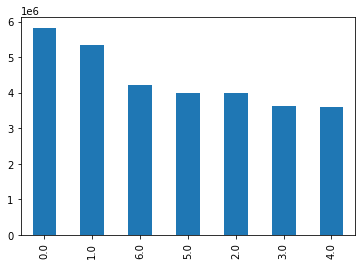

In [7]:
# bar chart with observations are ordered from largest to smallest
ords_prods_merge3['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

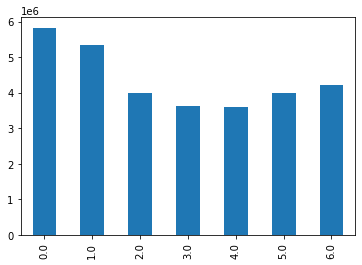

In [8]:
# bar chart with no order
ords_prods_merge3['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

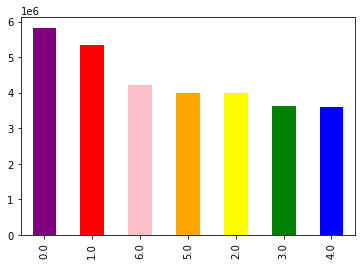

In [9]:
# using colors for the plot bar
ords_prods_merge3['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting Charts

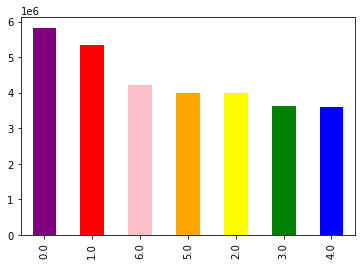

In [10]:
# save within bar object
bar = ords_prods_merge3['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

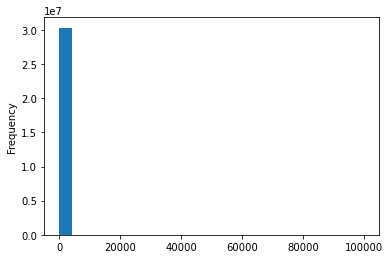

In [14]:
# creating a histogram of the “prices” column
ords_prods_merge3['prices'].plot.hist(bins = 25)

Something doesn’t seem right here --> You should have gotten 25 bars (one for each bin). Instead, however, you’ve gotten one single column

In [15]:
ords_prods_merge3['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
ords_prods_merge3['prices'].mean()

11.977249441686086

In [17]:
ords_prods_merge3['prices'].median()

7.4

In [18]:
ords_prods_merge3['prices'].max()

99999.0

Having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one

<AxesSubplot:xlabel='prices', ylabel='prices'>

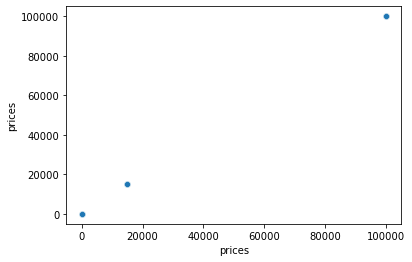

In [20]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge3)

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier. Run this check via the following code

In [23]:
ords_prods_merge3.loc[ords_prods_merge3['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,...,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,price_flag,mean_order_frequency,order_frequency_flag
1429,912404,17.0,prior,12.0,2.0,14.0,5.0,21553.0,5.0,0.0,...,both,High-range product,Regularly busy,Most orders,41.0,Loyal customer,109.670103,High spender,8.342466,Frequent customer
1491,603376,17.0,prior,22.0,6.0,16.0,4.0,21553.0,3.0,1.0,...,both,High-range product,Regularly busy,Most orders,41.0,Loyal customer,109.670103,High spender,8.342466,Frequent customer
15448,3264360,135.0,prior,2.0,2.0,21.0,13.0,21553.0,6.0,0.0,...,both,High-range product,Regularly busy,Average orders,5.0,New customer,1250.245833,High spender,12.120000,Regular customer
15454,892534,135.0,prior,3.0,0.0,8.0,12.0,21553.0,3.0,1.0,...,both,High-range product,Busiest days,Most orders,5.0,New customer,1250.245833,High spender,12.120000,Regular customer
50648,229704,342.0,prior,8.0,1.0,19.0,30.0,21553.0,9.0,0.0,...,both,High-range product,Busiest days,Most orders,17.0,Regular customer,120.090909,High spender,20.180451,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483598,1039454,205650.0,prior,15.0,1.0,10.0,7.0,21553.0,6.0,1.0,...,both,High-range product,Busiest days,Most orders,26.0,Regular customer,358.255457,High spender,6.979532,Frequent customer
30483644,3172853,205650.0,prior,18.0,1.0,9.0,7.0,21553.0,17.0,1.0,...,both,High-range product,Busiest days,Most orders,26.0,Regular customer,358.255457,High spender,6.979532,Frequent customer
30509374,2504315,205818.0,prior,3.0,5.0,15.0,3.0,21553.0,13.0,0.0,...,both,High-range product,Regularly busy,Most orders,26.0,Regular customer,173.751955,High spender,13.392265,Regular customer
30509384,1108388,205818.0,prior,5.0,4.0,5.0,1.0,21553.0,5.0,1.0,...,both,High-range product,Slowest days,Fewest orders,26.0,Regular customer,173.751955,High spender,13.392265,Regular customer


In [24]:
# let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs
ords_prods_merge3.loc[ords_prods_merge3['prices'] >100, 'prices'] = np.nan

In [25]:
ords_prods_merge3['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

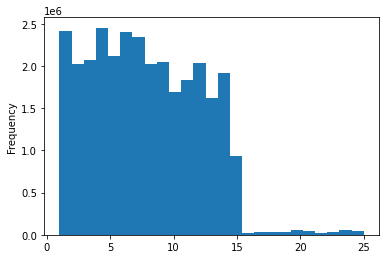

In [26]:
# creating a new histogram of the “prices” column, after editing
ords_prods_merge3['prices'].plot.hist(bins = 25)

The results make much more sense now: most products are between $1 and $15, while a few are higher priced at $15 to $25

<AxesSubplot:ylabel='Frequency'>

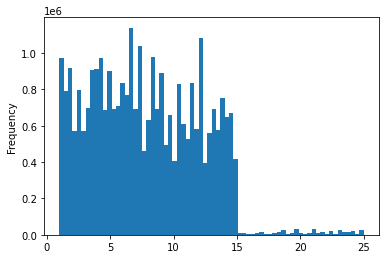

In [27]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70
ords_prods_merge3['prices'].plot.hist(bins = 70)

# Creating Line Charts

this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error. To avoid this, you can use the subsetting method you should be familiar with by now

In [29]:
df = ords_prods_merge3[:2000000]

# Sampling Data

 the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio. 

In [31]:
np.random.seed(4)

In [33]:
# creating a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge3)) <= 0.7

In [37]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [39]:
np.random.rand(10)

array([0.63364823, 0.74880388, 0.49850701, 0.22479665, 0.19806286,
       0.76053071, 0.16911084, 0.08833981, 0.68535982, 0.95339335])

 This function is what will actually create your list of random floating numbers between 0 and 1

In [40]:
len(ords_prods_merge3)

30563166

You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your list to split your dataframe into two samples? This will involve an elegant hack.

In [41]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge3[dev]

In [42]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge3[~dev]

 if you added the rows of both samples together, you’d get the same numbers of rows as your original ords_prods_merge dataframe

In [43]:
len(big) + len (small)

30563166

As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_the_week.” You can achieve this by running (and checking the result!) of the following command

In [45]:
df_2 = small[['orders_day_of_week','prices']]

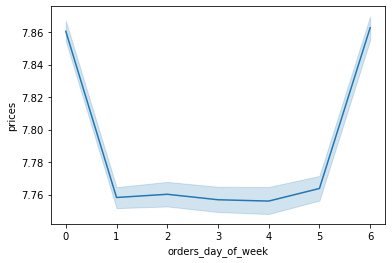

In [46]:
# finally ready to create the chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [52]:
# export
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

In [51]:
df_4 = ords_prods_merge3[['orders_day_of_week','prices']]

In [ ]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')